<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Nombres Apellidos  <br>
Fecha: DD/MM/2022

# Importación de librerias necesarias

# Parte I. Regresión

In [1]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada. 

In [2]:
os.chdir("C:/Users/bpagu/Desktop/UNIR/3. Técnicas de Inteligencia Artificial/Actividades/Actividad 2/Regresion")

In [3]:
#Código para cargar el Dataset
#url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'
df_train = pd.read_csv("USA_Housing.csv")
df_train.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Descripción de la fuente del Dataset

Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).

## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df_train.shape[0]

5000

**Número de instancias en total:** Se tiene en total 5000 instancias en nuestro dataset.

In [6]:
df_train.shape[1]

7

**Número de atributos de entrada:** Se tiene en total 6 variables independientes y una explicativa, se detalla a continuación su significado y tipo

- **Avg.Area_Income:** Ingresos promedio por área (numérica continua).
- **Avg.Area_House_Age:** Antiguedad de las casas en promedio por área (numérica continua).
- **Avg.Area_Number_of_Rooms:** Número de habitaciones promedio por área (numérica continua).
- **Avg.Area_Number_of_Bedrooms:** Número de dormitorios promedio por área (numérica continua).
- **Area_Population:** Población del área (numérica continua).
- **Price:** Precio (numérica continua).
- **Address:** Dirección (categórica nominal).


In [7]:
df_train["Avg. Area Income"].describe()

count      5000.000000
mean      68583.108984
std       10657.991214
min       17796.631190
25%       61480.562388
50%       68804.286404
75%       75783.338666
max      107701.748378
Name: Avg. Area Income, dtype: float64

In [8]:
df_train[df_train["Avg. Area Income"] <= 17796.631190]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
39,17796.63119,4.949557,6.713905,2.5,47162.183643,302355.835979,"9932 Eric Circles\nLake Martha, WY 34611-6127"


**Estadísticas de la variable objetiva**

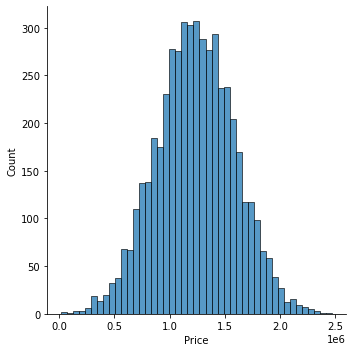

In [9]:
sns.displot(df_train["Price"])

Se muestra una distribución lineal en los precios, sin colas pronunciadas. Sin embargo, graficaremos un boxplot para determinar valores atípicos.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

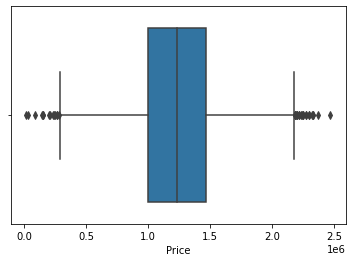

In [10]:
sns.boxplot(df_train["Price"])

Se muestra que el precio tiene valores atípicos en las dos colas; es decir, existen casas con precios muy elevados, así como también casas con precios muy bajos. A continuación calcularemos la cantidad de valores atípicos.

In [11]:
Q1 = df_train["Price"].quantile(0.25)
Q2 = df_train["Price"].quantile(0.50)
Q3 = df_train["Price"].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5 * IQR
BS = Q3 + 1.5 * IQR
print("Límite Inferior: ", BI)
print("Límite Superior: ", BS)

Límite Inferior:  287127.5313045685
Límite Superior:  2181659.807955746


In [12]:
len(df_train[(df_train["Price"]<=BI)|(df_train["Price"]>=BS)])

35

Existen solo 35 valores atípicos en la variable precio. Por lo tanto, al ser un valor ínfimo, procederemos a eliminarlos. 

In [21]:
df_train = df_train[(df_train["Price"]>=BI)&(df_train["Price"]<=BS)]
df_train = df_train.iloc[:,:-1].reset_index(drop=True)

Se muestra el nuevo dataset con los valores atípicos eliminados

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

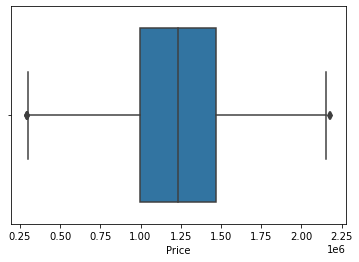

In [14]:
sns.boxplot(df_train["Price"])

Se muestra el gráfico de boxplot para la variable Price y se nota una mejoría en su distribución.

**Estadísticas los atributos en relación con la variable objetivo.**

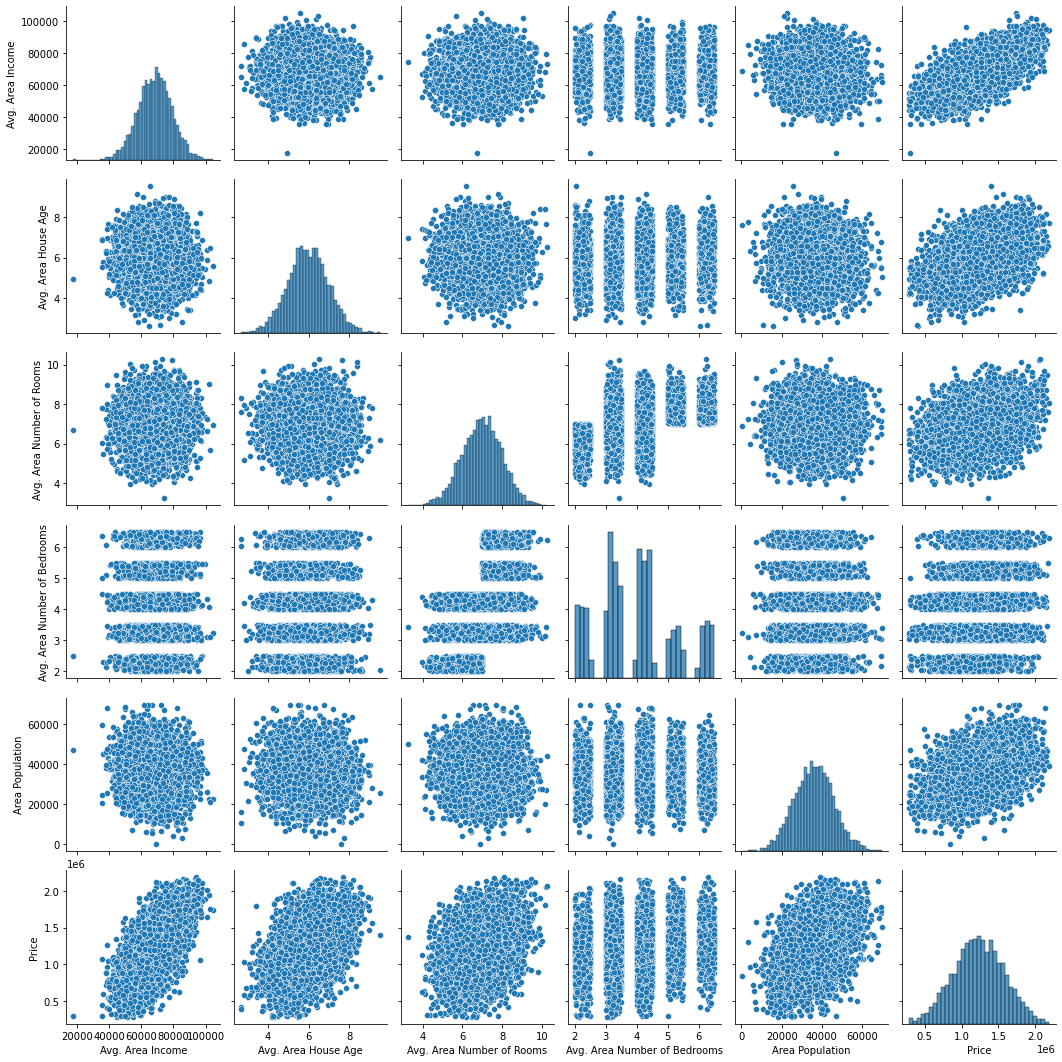

In [15]:
sns.pairplot(df_train)

Si nos ubicamos en la última fila, podemos observar la relación del target Price con las demás variables. A simple vista, se puede intuir una relación lineal entre Price y las demás variables a excepción de Número de dormitorios.

**Principales hallazagos encontrados:** Se identificó que la variable Price tenía 35 valores atípicos(Solucionado). Por otro lado, la relación entre Price y las demás variables podría ser lineal como se muestra en la gráfica anterior a excepción del número de dormitorios.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [ ]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding

<AxesSubplot:>

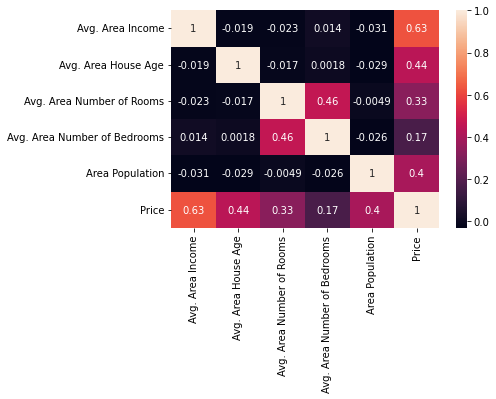

In [16]:
sns.heatmap(df_train.corr(),annot=True)

En mi caso, considero que una correlación por encima del 70% no es aceptable y se debería eliminar al menos una de las variables correlacionadas, pero para este caso no se tienen correlaciones elevadas entre las variables independientes. 

In [17]:
df_train.corr().Price.sort_values(ascending=False)

Price                           1.000000
Avg. Area Income                0.628043
Avg. Area House Age             0.443324
Area Population                 0.399836
Avg. Area Number of Rooms       0.327296
Avg. Area Number of Bedrooms    0.166561
Name: Price, dtype: float64

En este caso, la variable que más explica el precio de las casas es el ingreso promedio por área y el que menos es número promedio de dormitorios por área.

In [18]:
df_train.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4965.000000,4965.000000,4965.000000,4965.000000,4965.000000,4.965000e+03
mean,68544.642807,5.975073,6.987299,3.980052,36153.075174,1.230676e+06
std,10529.850867,0.987660,1.001037,1.234641,9893.689707,3.433926e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,2.873076e+05
25%,61492.921591,5.326798,6.301235,3.140000,29404.067583,9.988556e+05
50%,68785.854736,5.969127,7.002327,4.050000,36179.405767,1.232015e+06
75%,75706.680518,6.646560,7.665602,4.490000,42803.221409,1.468030e+06
max,104702.724257,9.519088,10.280022,6.500000,69621.713378,2.180066e+06


Como nuestras variables están en diferentes escalas, necesitamos estandarizarlas para evitar que el modelo de regresión no considere a las de menor escala debido a las grandes diferencias, como por ejemplo las variables "Avg. Area Number of Bedrooms"  y "Avg. Area Income"

In [19]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [23]:
X = df_train.drop(columns = ["Price"])
y = df_train["Price"]

In [26]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

## División del dataset en datos de entrenamiento y datos de test 

In [ ]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state = 0)

## Propuesta de arquitectura de red neuronal

Describe: 

+ las neuronas en la capa de entrada 
+ las capas intermedias – al menos dos – 
+ capa de salida
+ funciones de activación

In [ ]:
# Código de la estructuración de la red

In [ ]:
#Código de la inspección del modelo de red

##  Ajuste de modelo de Regresión RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [ ]:
#Código de ajuste y entrenamiento

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

In [ ]:
#Código de evaluación de la red propuesta (entrenamiento y validación)

### Evalúe los resultados  para el conjunto de test.

In [2]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)

## Ajuste de modelos de Regresión alternativos

Elige al menos un método de regresión no basado en redes neuronales (p.ej. regresión lineal, regresión polinómica, regresión logarítmica, SVR, random forest regression, etc.).

In [31]:
#Código de ajuste del modelo 1
from sklearn.linear_model import LinearRegression

In [32]:
reg=LinearRegression()

In [33]:
reg.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred_linear = reg.predict(X_test)

In [39]:
mse = sum((y_test-y_pred_linear)**2)/len(y_test)
rmse = mse**1/2
mae = sum(abs(y_test-y_pred_linear))/len(y_test)

In [40]:
mae

79840.809546791

In [41]:
y_pred_linear

array([1473258.27438939,  818000.75667912, 1353376.39300952, ...,
        828786.2232959 , 1424748.59428367, 1520486.87748183])

Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [ ]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla

In [ ]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica

Construya un párrafo con los principales hallazgos.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: 
+ Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. 
+ Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido
+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.